Let's play with the Kaggle Titanic data set and Keras

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils

import csv
import re

import matplotlib.pyplot as plt

In [31]:
row_num = 0
training_data = []

# import training data
with open('./data/train.csv', 'r') as train_data:
    for line in csv.reader(train_data, delimiter=','):
        if row_num > 0:
            training_data.append(line)

        row_num += 1

train_data.close()

print(training_data[0])

['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']


In [88]:
#pre-process training data
x_train = []
y_train = []

def preprocess_data(all_data, is_test_data = 0):
    x_train = []
    y_train = []
    
    classes = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]]
    gender = {'male': [0, 1], 'female': [1, 0]}

    if(is_test_data == 0):
        np.random.shuffle(all_data)
    
    for data in all_data:
    
        train_vector = []
        
        if(is_test_data == 0):
            y_train.append(int(data[1]))

        train_vector.extend(classes[int(data[2])])
        train_vector.extend(gender[data[4]])
        
        if (data[5] != ''):
            train_vector.append(float(data[5]) / 100)
        else:
            train_vector.append(0)
            
        train_vector.append(float(data[6]) / 5)
        train_vector.append(float(data[7]) / 6)        
        
        if (data[9] != ''):
            train_vector.append(float(data[9]) / 513)
        else:
            train_vector.append(0)
        
        x_train.append(train_vector)
        
    return x_train, y_train

x_train, y_train = preprocess_data(training_data)
print(x_train[0])

[1, 0, 0, 1, 0, 0.54, 0.2, 0.0, 0.15256666666666666]


In [89]:
model = Sequential()
model.add(Dense(32, input_dim = len(x_train[0]), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [90]:
adam = Adam(lr=0.0003)

model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [91]:
history = model.fit(np.array(x_train), np.array(y_train), validation_split = 0.05, epochs = 25, batch_size = 16, verbose = 2)

Train on 846 samples, validate on 45 samples
Epoch 1/25
 - 1s - loss: 0.6587 - acc: 0.7600 - val_loss: 0.6305 - val_acc: 0.7778
Epoch 2/25
 - 0s - loss: 0.6135 - acc: 0.7837 - val_loss: 0.5798 - val_acc: 0.8222
Epoch 3/25
 - 0s - loss: 0.5789 - acc: 0.7742 - val_loss: 0.5417 - val_acc: 0.8222
Epoch 4/25
 - 0s - loss: 0.5404 - acc: 0.7707 - val_loss: 0.4961 - val_acc: 0.8444
Epoch 5/25
 - 0s - loss: 0.5009 - acc: 0.7813 - val_loss: 0.4713 - val_acc: 0.7778
Epoch 6/25
 - 0s - loss: 0.4762 - acc: 0.7896 - val_loss: 0.4553 - val_acc: 0.8000
Epoch 7/25
 - 0s - loss: 0.4622 - acc: 0.7931 - val_loss: 0.4662 - val_acc: 0.7778
Epoch 8/25
 - 0s - loss: 0.4521 - acc: 0.7967 - val_loss: 0.4601 - val_acc: 0.8000
Epoch 9/25
 - 0s - loss: 0.4475 - acc: 0.7979 - val_loss: 0.4594 - val_acc: 0.8222
Epoch 10/25
 - 0s - loss: 0.4446 - acc: 0.8061 - val_loss: 0.4587 - val_acc: 0.8222
Epoch 11/25
 - 0s - loss: 0.4430 - acc: 0.7955 - val_loss: 0.4508 - val_acc: 0.8222
Epoch 12/25
 - 0s - loss: 0.4415 - acc: 

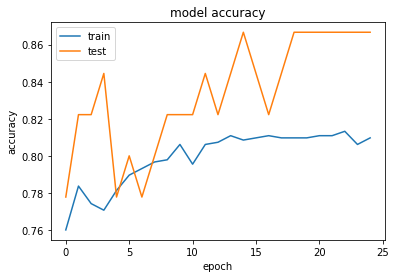

In [92]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

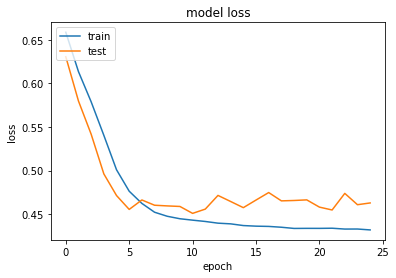

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [94]:
row_num = 0
testing_data = []
x_test = []
y_test = []

# import test data
with open('./data/test.csv', 'r') as test_data:
    for line in csv.reader(test_data, delimiter=','):
        if row_num > 0:
            testing_data.append(line)

        row_num += 1

test_data.close()

x_test, y_test = preprocess_data(testing_data, 1)
print(testing_data[0])

['892', '', '3', 'Kelly, Mr. James', 'male', '34.5', '0', '0', '330911', '7.8292', '', 'Q']


In [95]:
preds = model.predict(np.array(x_test))

In [96]:
p_a = [int(round(pred[0])) for pred in preds]
print(p_a)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [105]:
submission_data = []

idx = 0

for prediction in p_a:
    submission_data.append([testing_data[idx][0], prediction])
    idx += 1

print(submission_data[10])

['902', 0]


In [109]:
with open('./data/submission.csv', 'w', newline='') as submit_file:
    wr = csv.writer(submit_file, quoting=csv.QUOTE_ALL)
    wr.writerows(submission_data)